In [2]:
%pip install pyscreenshot

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pyscreenshot as ImageGrab
import time

In [5]:
images_folder= "captured_images/9/"
for i in range(0,100):
     time.sleep(6) 
     im=ImageGrab.grab(bbox=(60,170,400,550))  #x1,y1,x2,y2
     print("saved......",i)
     im.save(images_folder+str(i)+'.png')
     print("clear screeen now and redraw now.........")

saved...... 0
clear screeen now and redraw now.........
saved...... 1
clear screeen now and redraw now.........
saved...... 2
clear screeen now and redraw now.........
saved...... 3
clear screeen now and redraw now.........
saved...... 4
clear screeen now and redraw now.........
saved...... 5
clear screeen now and redraw now.........
saved...... 6
clear screeen now and redraw now.........
saved...... 7
clear screeen now and redraw now.........
saved...... 8
clear screeen now and redraw now.........
saved...... 9
clear screeen now and redraw now.........
saved...... 10
clear screeen now and redraw now.........
saved...... 11
clear screeen now and redraw now.........
saved...... 12
clear screeen now and redraw now.........
saved...... 13
clear screeen now and redraw now.........
saved...... 14
clear screeen now and redraw now.........
saved...... 15
clear screeen now and redraw now.........
saved...... 16
clear screeen now and redraw now.........
saved...... 17
clear screeen now and redr

In [3]:
%pip install opencv-python 
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


# Generate dataset

In [1]:
import cv2 
import csv
import glob

header  =["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open ('dataset.csv' , 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_Path in dirList: 
        im= cv2.imread(img_Path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)

        data=[]
        data.append(label)
        rows, cols = roi.shape

      ## Add pixel one by one into data  array
        for i in range (rows):
           for j in range(cols):
              k =roi[i,j]
              if k>100:
                   k=1
              else:  
                  k=0
              data.append(k)
   with open('dataset.csv', 'a') as f:
      writer = csv.writer(f)
      writer.writerow(data)

# Load the dataset

In [2]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......

data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  \
1660     4      1      1      1      1      1      1      1      1      1   
231      1      1      1      1      1      1      1      1      1      1   
1337     1      1      1      1      1      1      1      1      1      1   
526      0      1      1      1      1      1      1      1      1      1   
1040     0      1      1      1      1      1      1      1      1      1   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1762     5      1      1      1      1      1      1      1      1      1   
2036     8      1      1      1      1      1      1      1      1      1   
1934     7      1      1      1      1      1      1      1      1      1   
1605     4      1      1      1      1      1      1      1      1      1   
920      0      1      1      1      1      1      1      1      1      1   

      ... pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780  \

In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
%pip install matplotlib
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# separation of dependent and independent variable

In [4]:
X = data.drop(["label"],axis=1)
Y = data["label"]

In [5]:
import pandas as pd

# Load the CSV
df = pd.read_csv("dataset.csv")  # Replace with your actual path

# Remove bad rows (where 'label' is repeated)
df = df[df["label"] != "label"]

# Convert all values to numeric
df = df.astype("float32")

# Split features and labels
X = df.drop("label", axis=1)
Y = df["label"]

# Preview of an image using matplotlib

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

0.0


Label: 0.0


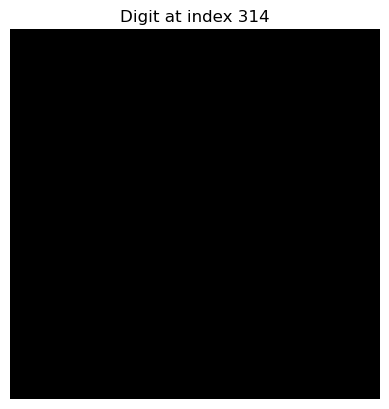

In [6]:
import matplotlib.pyplot as plt

idx = 314
img = X.loc[idx].values.reshape(28, 28)  # Reshape 784 → 28x28
print("Label:", Y.loc[idx])

plt.imshow(img, cmap='gray')
plt.title(f"Digit at index {idx}")
plt.axis('off')
plt.show()


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load dataset
digits = datasets.load_digits()

# Features and labels
X = digits.data
y = digits.target

# Split into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=6)


In [8]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [9]:
import os

# Create the 'model' directory if it doesn't exist
os.makedirs("model", exist_ok=True)

# Now save the model
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [10]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.9694444444444444


In [ ]:
#prediction of image drawn in paint
 
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("model/digit_recognizer")
images_folder="img/"
 
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
   
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
   rows,cols=roi.shape
   
   X = []
   
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
           
   predictions  =model.predict([im_scaled])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Predic

In [14]:
import cv2
import numpy as np

# im_gray is your grayscale 28x28 image
im_resized = cv2.resize(im_gray, (8, 8))      # Resize to 8x8
im_flat = im_resized.flatten().astype(float)  # Flatten to 64 features

# Normalize like the training data (digits dataset has values 0–16)
im_scaled = (16 * im_flat / 255.0).astype(np.float64)

prediction = model.predict([im_scaled])


In [13]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox
 
window=tk.Tk()
window.title("Handwritten digit recognition")
 
l1=tk.Label(window,text="Digit",font=('Algerian',20))
l1.place(x=5,y=0)
 
t1=tk.Entry(window,width=20, border=5)
t1.place(x=150, y=0)
 
def screen_capture():
   import pyscreenshot as ImageGrab
   import time
   import os
   os.startfile("C://Users/Aziza/AppData/Local/Microsoft/WindowsApps/mspaint.exe")
   os.chdir("C://Users/Aziza/Untitled Folder/captured_images/0")
   s1=t1.get()
   os.mkdir(s1)
   os.chdir("C://Users/Aziza/Untitled Folder/Untitled Folder")
 
   images_folder="captured_images/"+s1+"/"
   time.sleep(15)
   for i in range(0,5):
       time.sleep(8)
       im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
       print("saved......",i)
       im.save(images_folder+str(i)+'.png')
       print("clear screen now and redraw now........")
   messagebox.showinfo("Result","Capturing screen is completed!!")
   
b1=tk.Button(window,text="1. Open paint and capture the screen", font=('Algerian',15),bg="orange",fg="black",command=screen_capture)
b1.place(x=5, y=50)
 
def generate_dataset():
   import cv2
   import csv
   import glob
 
   header  =["label"]
   for i in range(0,784):
       header.append("pixel"+str(i))
   with open('dataset.csv', 'a') as f:
       writer = csv.writer(f)
       writer.writerow(header)
 
   for label in range(10):
       dirList = glob.glob("captured_images/"+str(label)+"/*.png")
 
       for img_path in dirList:
           im= cv2.imread(img_path)
           im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
           im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
           roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
 
           data=[]
           data.append(label)
           rows, cols = roi.shape
 
           ##  Fill the data array with pixels one by one.
           for i in range(rows):
               for j in range(cols):
                   k =roi[i,j]
                   if k>100:
                       k=1
                   else:
                       k=0
                   data.append(k)
           with open('dataset.csv', 'a') as f:
               writer = csv.writer(f)
               writer.writerow(data)
   messagebox.showinfo("Result","Generating dataset is completed!!")
   
b2=tk.Button(window,text="2. Generate dataset", font=('Algerian',15),bg="pink",fg="blue",command=generate_dataset)
b2.place(x=5, y=100)
 
def train_save_accuracy():
   import pandas as pd
   from sklearn.utils import shuffle
   data  =pd.read_csv('dataset.csv')
   data=shuffle(data)
   X = data.drop(["label"],axis=1)
   Y= data["label"]
   from sklearn.model_selection import train_test_split
   train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)
   import joblib
   from sklearn.svm import SVC
   classifier=SVC(kernel="linear", random_state=6)
   classifier.fit(train_x,train_y)
   joblib.dump(classifier, "model/digit_recognizer")
   from sklearn import metrics
   prediction=classifier.predict(test_x)
   acc=metrics.accuracy_score(prediction, test_y)
   messagebox.showinfo("Result",f"Your accuracy is {acc}")
   
b3=tk.Button(window,text="3. Train the model, save it and calculate accuracy", font=('Algerian',15),bg="green",fg="white",command=train_save_accuracy)
b3.place(x=5, y=150)
 
def prediction():
   import joblib
   import cv2
   import numpy as np #pip install numpy
   import time
   import pyscreenshot as ImageGrab
   import os
   os.startfile("C://Users/Aziza/AppData/Local/Microsoft/WindowsApps/mspaint.exe")
   
   model=joblib.load("model/digit_recognizer")
   images_folder="img/"
   time.sleep(15)
   while True:
       img=ImageGrab.grab(bbox=(60,170,400,500))
 
       img.save(images_folder+"img.png")
       im = cv2.imread(images_folder+"img.png")
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
 
       #Threshold the image
       ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
       roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
 
       rows,cols=roi.shape
 
       X = []
 
       ##  Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k = roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               X.append(k)
 
       predictions  =model.predict([X])
       print("Prediction:",predictions[0])
       cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
 
       cv2.startWindowThread()
       cv2.namedWindow("Result")
       cv2.imshow("Result",im)
       cv2.waitKey(10000)
       if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
           break
   cv2.destroyAllWindows()
   
b4=tk.Button(window,text="4. Live prediction", font=('Algerian',15),bg="white",fg="red",command=prediction)
b4.place(x=5, y=200)
 
window.geometry("600x300")
window.mainloop()

In [7]:
%pip install pandas 

Note: you may need to restart the kernel to use updated packages.
